In [168]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,multilabel_confusion_matrix,roc_auc_score,roc_curve,auc,ConfusionMatrixDisplay,precision_score,recall_score

In [93]:
x_train_all=pd.read_csv("CompleteDataSet/x_train_all.csv")
y_train_all=pd.read_csv("CompleteDataSet/y_train_all.csv")
x_test_all=pd.read_csv("CompleteDataSet/x_test_all.csv")
y_test_all=pd.read_csv("CompleteDataSet/y_test_all.csv")

### Function for using normal decision tree and getting the values for the metrics

In [ ]:
#function that uses the train test split data
def train_test_split(X_train,X_test,y_test,y_train):
    dt_classifier = DecisionTreeClassifier()#initializing the tree 
    dt_classifier.fit(X_train,y_train)# fitting the tree 
    predicted=dt_classifier.predict(X_test)# predicting the values
    #finding the probability predictions
    predicted_probs = dt_classifier.predict_proba(X_test)
    
    #finding the accuracy
    accuracy = accuracy_score(y_test,predicted )
    #finding the f1
    f1 = f1_score(predicted, y_test, average="weighted")
    #finding the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted)
    #finding the precision
    precision = precision_score(y_test, predicted, average="weighted",zero_division=1)
    #finding the recall
    recall = recall_score(y_test, predicted, average="weighted")
    #finding the roc
    Y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())
    #plotiing the AUC graph
    auc_val = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    #plotting the confusion matrix 
    out=ConfusionMatrixDisplay(conf_matrix,display_labels=dt_classifier.classes_)
    out.plot()
    plt.show()
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("False Positive Rate:", fpr)
    print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)



In [309]:
#function that uses the train test split data
def train_test_split_with_model(model,X_train,X_test,y_test,y_train):
    dt_classifier = model#initializing the tree 
    dt_classifier.fit(X_train,y_train)# fitting the tree 
    predicted=dt_classifier.predict(X_test)# predicting the values
    #finding the probability predictions
    predicted_probs = dt_classifier.predict_proba(X_test)
    
    #finding the accuracy
    accuracy = accuracy_score(y_test,predicted )
    #finding the f1
    f1 = f1_score(predicted, y_test, average="weighted")
    #finding the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted)
    #finding the precision
    precision = precision_score(y_test, predicted, average="weighted",zero_division=1)
    #finding the recall
    recall = recall_score(y_test, predicted, average="weighted")
    #finding the roc
    Y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9])
    roc = roc_auc_score(Y_test_bin, predicted_probs, multi_class="ovr", average="weighted")

    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), predicted_probs.ravel())
    #plotiing the AUC graph
    auc_val = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC (area = %0.2f)' % auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    #plotting the confusion matrix 
    out=ConfusionMatrixDisplay(conf_matrix,display_labels=dt_classifier.classes_)
    out.plot()
    plt.show()
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall/Sensitivity/True Positive Rate:", recall)
    print("False Positive Rate:", fpr)
    print("Area under ROC curve:", roc)
    print("Confusion Matrix:\n", conf_matrix)



### Cross Validation

In [268]:
# from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# def plot_learning_curve(input_data, labels):
#     dt_classifier = DecisionTreeClassifier()

#     train_sizes = np.linspace(0.1, 1.0, 10)
#     train_scores, val_scores = [], []

#     for size in train_sizes:
#         sample_size = int(len(input_data) * size)
#         train_score = np.mean(cross_val_score(dt_classifier, input_data[:sample_size], labels[:sample_size], cv=10))
#         train_scores.append(train_score)
#         val_score = np.mean(cross_val_score(dt_classifier, input_data, labels, cv=10))
#         val_scores.append(val_score)

#     plt.figure(figsize=(10, 6))
#     plt.plot(train_sizes * len(input_data), train_scores, 'o-', color="red", label="Training score")
#     plt.plot(train_sizes * len(input_data), val_scores, 'o-', color="green", label="Cross-validation score")

#     plt.title("Decision Tree Learning Curve")
#     plt.xlabel("Number of training examples")
#     plt.ylabel("Accuracy")
#     plt.legend(loc="best")
#     plt.show()

#     print("Average Training Score:", sum(train_scores)/10 )
#     print("Average Cross-Validation Score:",sum(val_scores)/10)

# def cross_val_metrics(input_data, labels):
#     # Instantiate your classifier (Decision Tree in this case)
#     clf = DecisionTreeClassifier()

#     # Perform 10-fold cross-validation
#     cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#     cv_scores = cross_val_score(clf, input_data, labels, cv=cv, scoring='accuracy')

#     # Print the cross-validation scores
#     print("Cross-validation accuracy scores:", cv_scores)
#     print("Mean accuracy:", cv_scores.mean())

#     # Get predicted labels for each fold
#     y_pred = cross_val_predict(clf, input_data, labels, cv=cv)

#     # Compute overall precision, recall, F1 score, and support
#     precision, recall, f1, support = precision_recall_fscore_support(labels, y_pred, average='macro')

#     # Print overall metrics
#     print("Overall Precision:", precision)
#     print("Overall Recall:", recall)
#     print("Overall F1 Score:", f1)

#     # Initialize variables to store overall metrics and confusion matrix
#     overall_conf_matrix = np.zeros((len(np.unique(labels)), len(np.unique(labels))))

#     # Loop over each fold
#     for i, (train_idx, test_idx) in enumerate(cv.split(input_data, labels)):
#         X_train, X_test = input_data.iloc[train_idx], input_data.iloc[test_idx]
#         y_train, y_test = labels.iloc[train_idx], labels.iloc[test_idx]

#         # Fit the classifier
#         clf.fit(X_train, y_train)

#         # Predict on the test set
#         y_fold_pred = clf.predict(X_test)

#         # Compute and plot confusion matrix
#         conf_matrix = confusion_matrix(y_test, y_fold_pred)
#         overall_conf_matrix += conf_matrix

#     # Calculate and print average confusion matrix

#     labels_annot = list(np.unique(np.array(labels)))
#     avg_conf_matrix = overall_conf_matrix / 10
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(avg_conf_matrix, annot=True, fmt=".2f", xticklabels=labels_annot, yticklabels=labels_annot)
#     plt.title("Average Confusion Matrix")
#     plt.xlabel("Predicted Labels")
#     plt.ylabel("Actual Labels")
#     plt.show()

#     X = input_data.values  # Convert DataFrame to NumPy array
#     y = labels.values  # Convert DataFrame to NumPy array

#     y_scores = np.zeros((len(y), len(np.unique(y))))

#     for train, test in cv.split(X, y):
#         clf.fit(X[train], y[train])
#         y_scores[test] = clf.predict_proba(X[test])

#     # Compute overall ROC-AUC score
#     roc_auc = roc_auc_score(label_binarize(y, classes=np.unique(y)), y_scores, average='macro')

#     # Print overall ROC-AUC score
#     print("Overall ROC-AUC:", roc_auc)

#     plot_learning_curve(input_data, labels)



In [275]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

def cross_val_metrics(input_data, labels):
    # Instantiate your classifier (Decision Tree in this case)
    clf = DecisionTreeClassifier()

    # Perform 10-fold cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(clf, input_data, labels, cv=cv, scoring='accuracy')

    # Print the cross-validation scores
    print("Cross-validation accuracy scores:", cv_scores)
    print("Mean accuracy:", cv_scores.mean())

    # Get predicted labels for each fold
    y_pred = cross_val_predict(clf, input_data, labels, cv=cv)

    # Compute overall precision, recall, F1 score, and support
    precision, recall, f1, support = precision_recall_fscore_support(labels, y_pred, average='macro')

    # Print overall metrics
    print("Overall Precision:", precision)
    print("Overall Recall:", recall)
    print("Overall F1 Score:", f1)

    # Initialize variables to store overall metrics and confusion matrix
    overall_conf_matrix = np.zeros((len(np.unique(labels)), len(np.unique(labels))))

    # Loop over each fold
    for i, (train_idx, test_idx) in enumerate(cv.split(input_data, labels)):
        X_train, X_test = input_data.iloc[train_idx], input_data.iloc[test_idx]
        y_train, y_test = labels.iloc[train_idx], labels.iloc[test_idx]

        # Fit the classifier
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_fold_pred = clf.predict(X_test)

        # Compute and plot confusion matrix
        conf_matrix = confusion_matrix(y_test, y_fold_pred)
        overall_conf_matrix += conf_matrix

    # Calculate and print average confusion matrix
    labels_annot = list(np.unique(np.array(labels)))
    avg_conf_matrix = overall_conf_matrix / 10
    plt.figure(figsize=(8, 6))
    sns.heatmap(avg_conf_matrix, annot=True, fmt=".2f", xticklabels=labels_annot, yticklabels=labels_annot)
    plt.title("Average Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.show()

    X = input_data.values  # Convert DataFrame to NumPy array
    y = labels.values  # Convert DataFrame to NumPy array

    y_scores = np.zeros((len(y), len(np.unique(y))))

    for train, test in cv.split(X, y):
        clf.fit(X[train], y[train])
        y_scores[test] = clf.predict_proba(X[test])

    # Compute overall ROC-AUC score
    roc_auc = roc_auc_score(label_binarize(y, classes=np.unique(y)), y_scores, average='macro')

    # Print overall ROC-AUC score
    print("Overall ROC-AUC:", roc_auc)

    # Plot learning curve
    plot_learning_curve(input_data, labels)

    


def plot_learning_curve(input_data, labels):
    dt_classifier = DecisionTreeClassifier()

    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores, val_scores = [], []

    for size in train_sizes:
        sample_size = int(len(input_data) * size)
        train_score = np.mean(cross_val_score(dt_classifier, input_data[:sample_size], labels[:sample_size], cv=10))
        train_scores.append(train_score)
        val_score = np.mean(cross_val_score(dt_classifier, input_data, labels, cv=10))
        val_scores.append(val_score)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes * len(input_data), train_scores, 'o-', color="red", label="Training score")
    plt.plot(train_sizes * len(input_data), val_scores, 'o-', color="green", label="Cross-validation score")

    plt.title("Decision Tree Learning Curve")
    plt.xlabel("Number of training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()

    print("Average Training Score:", sum(train_scores)/10 )
    print("Average Cross-Validation Score:",sum(val_scores)/10)


In [96]:
x_train_all.shape

(9690, 2304)

In [97]:
y_train_all.shape

(9690, 1)

### Fitting and Predicting with x_train

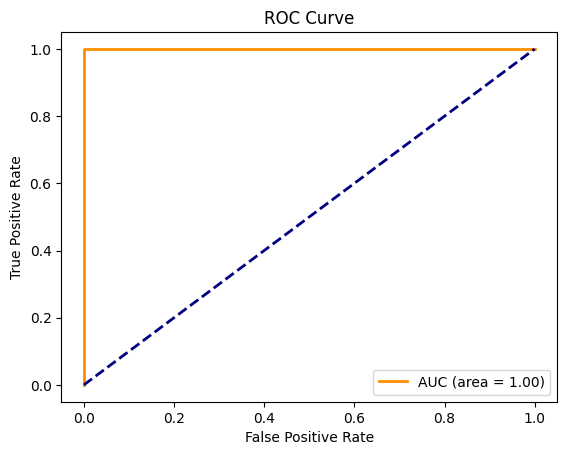

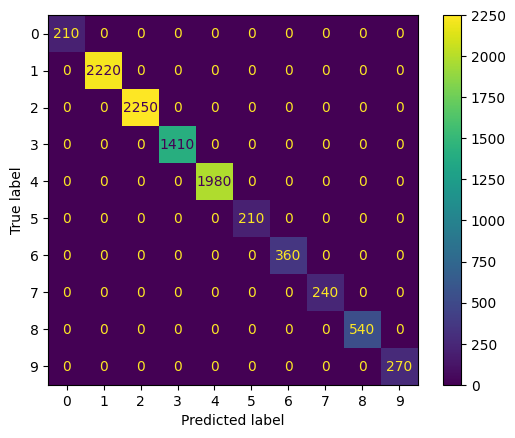

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall/Sensitivity/True Positive Rate: 1.0
False Positive Rate: [0. 0. 1.]
Area under ROC curve: 1.0
Confusion Matrix:
 [[ 210    0    0    0    0    0    0    0    0    0]
 [   0 2220    0    0    0    0    0    0    0    0]
 [   0    0 2250    0    0    0    0    0    0    0]
 [   0    0    0 1410    0    0    0    0    0    0]
 [   0    0    0    0 1980    0    0    0    0    0]
 [   0    0    0    0    0  210    0    0    0    0]
 [   0    0    0    0    0    0  360    0    0    0]
 [   0    0    0    0    0    0    0  240    0    0]
 [   0    0    0    0    0    0    0    0  540    0]
 [   0    0    0    0    0    0    0    0    0  270]]


In [230]:
train_test_split(x_train_all,x_train_all,y_train_all,y_train_all)

### Applying learning curve on x_train

Cross-validation scores: [0.56346749 0.63364293 0.68214654 0.70175439 0.64705882 0.71517028
 0.60268318 0.70072239 0.67905057 0.70485036]


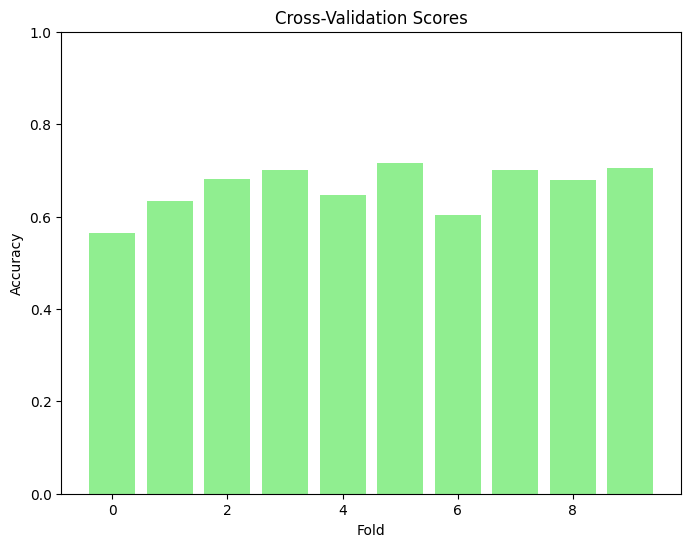

In [267]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


X = x_train_all
y = y_train_all

# Instantiate your classifier (Decision Tree in this case)
clf = DecisionTreeClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=10)  # cv=5 means 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(cv_scores)), cv_scores, color='lightgreen')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0, 1)  # Set the y-axis limits if needed
plt.show()

Cross-validation accuracy scores: [0.81940144 0.82249742 0.84416925 0.84313725 0.82146543 0.84004128
 0.83178535 0.8245614  0.85242518 0.80082559]
Mean accuracy: 0.8300309597523219
Overall Precision: 0.7924577827915996
Overall Recall: 0.8002025676270357
Overall F1 Score: 0.7959066619414188


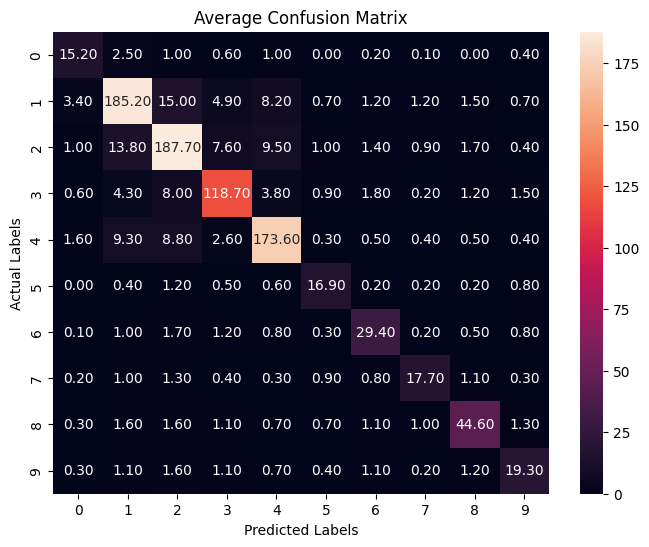

Overall ROC-AUC: 0.8897969447429211


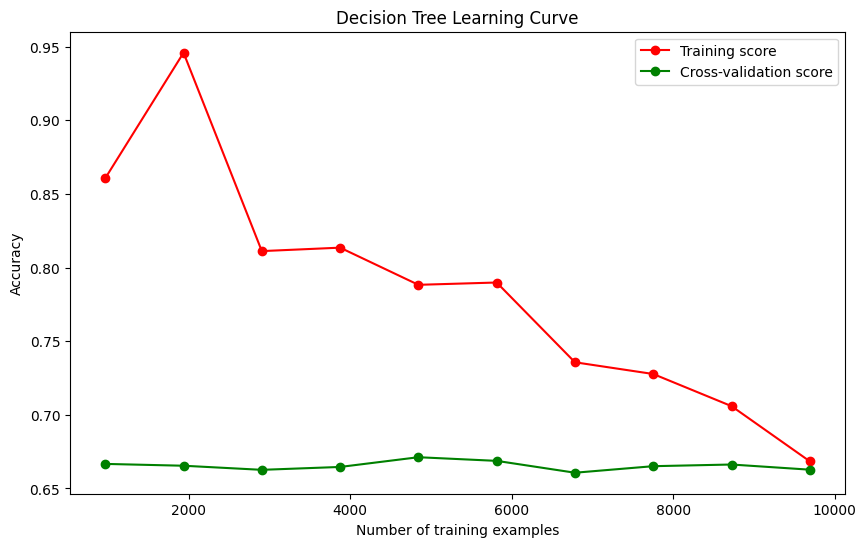

Average Training Score: 0.7846905276394419
Average Cross-Validation Score: 0.6654076367389061


In [276]:
cross_val_metrics(x_train_all,y_train_all)

#### Function for calculating decision tree accuracy

In [99]:
def accuracycalc(model,xdata,ydata,xtest,ytest): #func for calculating accuracy when the data is given
    dt_classifier = model #assigning the model
    dt_classifier.fit(xdata,ydata) #fitting the data into it
    pred=dt_classifier.predict(xtest) #predicting the labels for test data
    accuracy = accuracy_score(ytest, pred) #comparing and getting the accuracy
    print("Accuracy:",accuracy) #printing the accuracy

Calculating accuracy on the raw data

In [100]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,x_train_all,y_train_all,x_test_all,y_test_all) #calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.686084142394822


In [101]:
#loading the pre processed dataset from part2
part2_pro = pd.read_csv("part2_final_processed.csv")
part2_pro_test = pd.read_csv("part2_final_processed_xtest.csv")
part2_pro_y = pd.read_csv("part2_y_train_no_outliers.csv")
part2_pro_y_test = pd.read_csv("part2_y_train_no_outliers_ytest.csv")

In [225]:
part2_pro_y.shape

(9593, 1)

Calculating accuracy on the preprocessed data from part2 of the coursework

In [104]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,part2_pro,part2_pro_y,part2_pro_test,part2_pro_y_test)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.2360248447204969


Calculating accuracy on the preprocessed data from part1 of the coursework

In [226]:
part1_pro = pd.read_csv("processed_df_part1.csv")
part1_pro_y = y_train_all.copy()

In [227]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,part1_pro,part1_pro_y,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.38090614886731394


### PreProcessing

Oversampling and calculating the accuracy

In [105]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X = x_train_all #assigning x train data for oversampling
y = y_train_all #assigning y train data for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=19) #initializing smote for applying oversampling
X_resampled, y_resampled = smote.fit_resample(X, y) #performing oversampling and assigning the new x train 
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)#performing oversampling and assigning the new y train 
balanced_data.to_csv('balanced_dataset.csv', index=False) #saving the data


In [106]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,X_resampled,y_resampled,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.6734627831715211


why less compared to raw data: Decision trees are sensitive to the distribution of data. Oversampling might create "unnatural" patterns that a decision tree tries to fit. 

Undersampling and calculating the accuracy

In [107]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

X = x_train_all #assigning x train data for undersampling
y = y_train_all #assigning y train data for undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=19)#initializing randomundersampler for applying undersampling
X_resampled2, y_resampled2 = rus.fit_resample(X, y) #performing undersampling and assigning the new x train 
balanced_data2 = pd.concat([X_resampled2, y_resampled2], axis=1) #performing undersampling and assigning the new y train 
balanced_data2.to_csv('balanced_dataset2.csv', index=False)#saving the data


In [108]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,X_resampled2,y_resampled2,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.5521035598705502


why less comapared to raw data: By removing instances from the majority class, we might be discarding potentially useful information. Decision trees thrive on having diverse data to learn from. Undersampling could lead to a loss of valuable patterns and information that the model requires for accurate predictions.

label Encoding and calculating the accuracy

In [111]:
#creating the complete data set with y labels at the end with column name labels
y_train_all_copy = y_train_all.rename(columns={y_train_all.columns[0]:"labels"})
completedata = pd.concat([x_train_all,y_train_all_copy], axis=1)

In [112]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #initializing the encoder
completedata['labels'] = le.fit_transform(completedata['labels'])#applying the encoding

In [119]:
completedata_noy = completedata.drop(columns =['labels'])
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,completedata_noy,y_train_all,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.6870550161812298


Accuracy similar to raw data no difference

Outlier mining on raw data and calculating accuracy

In [123]:
# uses isolation forest algorithm to find outliers
from sklearn.ensemble import IsolationForest

# TODO
feature_names = [f'{str(col)}' for col in x_train_all.columns]
x_train_copy = x_train_all.copy()
x_train_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(x_train_copy)

outlier_indices = x_train_copy.index[outliers == -1]

x_train_no_outliers = x_train_copy.drop(outlier_indices)
x_train_no_outliers.to_csv('x_train_no_outliers.csv',index=False)

outlier_indices_df = pd.DataFrame({'outlier_index': outlier_indices})

outlier_indices_df.to_csv('outlier_indices.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [124]:
y_train_no_outliers  = y_train_all.drop(outlier_indices)

In [125]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,x_train_no_outliers,y_train_no_outliers,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.6896440129449838


as we can see the accuracy increased by a little that is because we had outliers.

Normalized Data and accuracy

In [126]:
#normalizing the data
mean=x_train_all.mean()
std=x_train_all.std()
x_train_norm=(x_train_all-mean)/std
x_train_norm=pd.DataFrame(x_train_norm)

In [127]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,x_train_norm,y_train_all,x_test_all,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.24271844660194175


why less compared to raw data: Normalization could accentuate certain features, affecting their importance, potentially altering the tree's decisions in an unintended way.

Thresholding and accuracy

In [128]:
import pandas as pd
import cv2
import numpy as np

df = x_train_all.copy()

for index, row in df.iterrows(): # Loop through the rows of the DataFrame
    pixel_values = row.values # Extract the pixel values as a 1D array
    image = np.array(pixel_values).reshape(48, 48)# Reshape the pixel values to form a 48x48 grayscale image 
    threshold_value = 128 # Setting the threshold value
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY) # Apply thresholding
    binary_pixel_values = binary_image.reshape(-1) # Flatten the binary image to a 1D array
    df.loc[index] = binary_pixel_values# Update the DataFrame with the binary pixel values



In [133]:
import pandas as pd
import cv2
import numpy as np


df2 = x_test_all.copy()

for index, row in df2.iterrows(): # Loop through the rows of the DataFrame
    pixel_values = row.values# Extract the pixel values as a 1D array
    image = np.array(pixel_values).reshape(48, 48) # Reshape the pixel values to form a 48x48 grayscale image
    threshold_value = 128# Setting the threshold value
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)# Apply thresholding
    binary_pixel_values = binary_image.reshape(-1) # Flatten the binary image to a 1D array
    df2.loc[index] = binary_pixel_values # Update the DataFrame with the binary pixel values



In [135]:
model =DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,df,y_train_all,df2,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.4627831715210356


why less compared to raw data: Decision trees can naturally handle continuous features and are capable of finding the best splitting points. Applying thresholding might overly simplify the decision-making process, leading to less accurate results.

Normalize the data then thresholding

In [137]:
x_train_norm.shape

(9690, 2304)

In [138]:
import pandas as pd
import cv2
import numpy as np

df3 = x_train_norm.copy()

for index, row in df3.iterrows():# Loop through the rows of the DataFrame
    pixel_values = row.values # Extract the pixel values as a 1D array
    image = np.array(pixel_values).reshape(48, 48) # Reshape the pixel values to form a 48x48 grayscale image
    threshold_value = 128 # Setting the threshold value
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)# Apply thresholding
    binary_pixel_values = binary_image.reshape(-1) # Flatten the binary image to a 1D array 
    df3.loc[index] = binary_pixel_values # Update the DataFrame with the binary pixel values



In [139]:
model =DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,df3,y_train_all,df2,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.24271844660194175


Thresholding then Normalizing

In [141]:
df.shape

(9690, 2304)

In [142]:
#normalizing the threshholded data
mean=df.mean()
std=df.std()
x_train_thres_norm=(df-mean)/std
x_train_thres_norm=pd.DataFrame(x_train_thres_norm)

In [143]:
model =DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,x_train_thres_norm,y_train_all,df2,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.4656957928802589


Histogram equalized dataset and calculating accuracy

In [144]:
import pandas as pd
import numpy as np
import cv2

df = x_train_all.copy()

def apply_histogram_equalization(image):#function to apply histogram equalization to an individual image
    image_matrix = image.values.reshape(48, 48).astype(np.uint8)# Reshape the image data
    equalized_image = cv2.equalizeHist(image_matrix)# Applying histogram equalization
    equalized_image_vector = equalized_image.ravel()# Reshaping the equalized image back to a feature vector
    return equalized_image_vector

equalized_images = df.apply(apply_histogram_equalization, axis=1)# Appling histogram equalization to each image in the DataFrame
equalized_df = pd.DataFrame(list(equalized_images))# Creating a new DataFrame with the equalized images

equalized_df.to_csv("equalized_dataset.csv", index=False)# Saving the equalized data to a new CSV file


In [145]:
import pandas as pd
import numpy as np
import cv2

df = x_test_all.copy()

def apply_histogram_equalization(image): #function to apply histogram equalization to an individual image
    image_matrix = image.values.reshape(48, 48).astype(np.uint8)# Reshaping the image data 
    equalized_image = cv2.equalizeHist(image_matrix)# Applying histogram equalization
    equalized_image_vector = equalized_image.ravel()# Reshaping the equalized image back to a feature vector
    return equalized_image_vector

equalized_images = df.apply(apply_histogram_equalization, axis=1)# Applying histogram equalization to each image in the DataFrame

equalized_df_test = pd.DataFrame(list(equalized_images)) # Creating a new DataFrame with the equalized images

equalized_df_test.to_csv("equalized_dataset_test.csv", index=False)# Saving the equalized data to a new CSV file


In [148]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,equalized_df,y_train_all,equalized_df_test,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.7427184466019418


The reason we used it is, in images where the contrast between different intensity levels is low, histogram equalization can redistribute the intensity values to cover a wider range. This can improve the perception of details in the images which is what we need in our case with the traffic sign.

Sobel operator

In [187]:
import pandas as pd
import numpy as np
import cv2

data1 = x_train_all.copy()
y_labels = y_train_all.copy()


processed_images = []# Create a list to store the processed images

for index, row in data1.iterrows():# Iterate through each row in the dataset
    image = row.values.reshape(48, 48).astype(np.uint8)# Reshape the 2304 features into a 48x48 image
    # Apply the Sobel filter to the image
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    sobel_image = np.sqrt(sobel_x ** 2 + sobel_y ** 2)# Combine the horizontal and vertical gradients
    
    sobel_image = (255 * (sobel_image - np.min(sobel_image)) / (np.max(sobel_image) - np.min(sobel_image))).astype(np.uint8)# Normalize the pixel values to the range [0, 255]
    
    sobel_features = sobel_image.ravel()# Flatten the image back to 2304 features
    
    processed_images.append(sobel_features)


processed_data = pd.DataFrame(processed_images)# Create a new DataFrame with the processed images

# Combine the processed data with the labels
#processed_data['label'] = y_labels
processed_data.to_csv("processed_dataset_sobel.csv", index=False) # Save the processed data to a new CSV file


In [188]:
import pandas as pd
import numpy as np
import cv2

data1_test = x_test_all.copy()
y_labels = y_test_all.copy()

processed_images = []# Create a list to store the processed images

for index, row in data1_test.iterrows():# Iterate through each row in the dataset
    image = row.values.reshape(48, 48).astype(np.uint8)# Reshape the 2304 features into a 48x48 image
    # Apply the Sobel filter to the image
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    sobel_image = np.sqrt(sobel_x ** 2 + sobel_y ** 2)# Combine the horizontal and vertical gradients
    
    sobel_image = (255 * (sobel_image - np.min(sobel_image)) / (np.max(sobel_image) - np.min(sobel_image))).astype(np.uint8)# Normalize the pixel values to the range [0, 255]
    
    sobel_features = sobel_image.ravel()# Flatten the image back to 2304 features
    
    processed_images.append(sobel_features)

processed_data_test = pd.DataFrame(processed_images)# Create a new DataFrame with the processed images

# Combine the processed data with the labels
#processed_data['label'] = y_labels

processed_data_test.to_csv("processed_dataset_sobel_test.csv", index=False)# Save the processed data to a new CSV file


In [189]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,processed_data,y_train_all,processed_data_test,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.5828478964401295


why less compared to raw data: The Sobel operator focuses on detecting edges, potentially altering the original features or removing certain details that could be crucial for the decision tree to make accurate splits.

Histogram matching 

In [190]:
import cv2
import numpy as np
import pandas as pd

# Load your grayscale images dataset
images_df = x_train_all.copy()

# Choose specific image numbers
selected_image_numbers = [4421, 17, 30, 154, 169, 9320, 62, 105, 233, 122]

# Create a dictionary to store histograms for each image
histograms_dict = {}

# Iterate through each selected image
for i, image_number in enumerate(selected_image_numbers):
    # Extract the pixel values of the selected image
    selected_image_pixels = np.array(images_df.loc[image_number])

    # Convert the pixel values to np.uint8
    selected_image_pixels = selected_image_pixels.astype(np.uint8)

    # Convert the pixel values to a one-dimensional array
    selected_image_pixels = selected_image_pixels.ravel()

    # Print the shape and type of selected_image_pixels for debugging
    print(f"Image {i} - Shape: {selected_image_pixels.shape}, Type: {type(selected_image_pixels)}")

    # Calculate the histogram for the selected image
    selected_image_histogram = cv2.calcHist([selected_image_pixels], [0], None, [256], [0, 256])

    # Normalize the histogram
    cv2.normalize(selected_image_histogram, selected_image_histogram, 0, 255, cv2.NORM_MINMAX)

    # Save the histogram in the dictionary
    histograms_dict[f'selected_image_histogram{i}'] = selected_image_histogram

    # Save the histogram as a numpy array
    np.save(f'selected_image_histogram{i}.npy', selected_image_histogram)

# Optional: Save the dictionary for future reference
np.save('histograms_dict.npy', histograms_dict)


Image 0 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 1 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 2 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 3 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 4 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 5 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 6 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 7 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 8 - Shape: (2304,), Type: <class 'numpy.ndarray'>
Image 9 - Shape: (2304,), Type: <class 'numpy.ndarray'>


In [191]:
import cv2
import numpy as np
import pandas as pd
# Load your grayscale images dataset
x_train = x_train_all.copy()  # Update with your actual file path

# Load your class labels
y_train = y_train_all.copy() # Update with your actual file path
y_train = y_train.rename(columns={y_train.columns[0]:"label"})
# Load histograms dictionary
histograms_dict = np.load('histograms_dict.npy', allow_pickle=True).item()

# Create a function for histogram matching
def match_histogram(image, target_histogram):
    # Convert image to uint8 and reshape if needed
    image = np.array(image, dtype=np.uint8).reshape(-1)

    # Equalize the image histogram using the target histogram
    equalized_image = cv2.LUT(image, target_histogram).reshape(x_train_all.shape[1], -1)

    return equalized_image.ravel()

# Apply histogram matching for each image in each class
matched_datasets = []

for class_label in range(10):
    class_df = x_train[y_train['label'] == class_label]

    matched_images = []

    # Get the target histogram for the current class
    target_histogram = histograms_dict[f'selected_image_histogram{class_label}'].astype(np.uint8).ravel()

    for _, row in class_df.iterrows():
        image = row.values
        matched_image = match_histogram(image, target_histogram)
        matched_images.append(matched_image)

    # Concatenate the matched images for the current class
    matched_class_df = pd.DataFrame(matched_images)
    matched_class_df['label'] = class_label  # Add a label column
    matched_datasets.append(matched_class_df)

# Concatenate the matched datasets for all classes
matched_x_train = pd.concat(matched_datasets, ignore_index=True)

# Save the new dataset with matched images
matched_x_train.to_csv('matched_x_train.csv', index=False)

matched_x_train = matched_x_train.drop(columns=['label'])


In [192]:
import cv2
import numpy as np
import pandas as pd
# Load your grayscale images dataset
x_test = x_test_all.copy()  # Update with your actual file path

# Load your class labels
y_test = y_test_all.copy() # Update with your actual file path
y_test = y_test.rename(columns={y_test.columns[0]:"label"})
# Load histograms dictionary
histograms_dict = np.load('histograms_dict.npy', allow_pickle=True).item()

# Create a function for histogram matching
def match_histogram(image, target_histogram):
    # Convert image to uint8 and reshape if needed
    image = np.array(image, dtype=np.uint8).reshape(-1)

    # Equalize the image histogram using the target histogram
    equalized_image = cv2.LUT(image, target_histogram).reshape(x_train_all.shape[1], -1)

    return equalized_image.ravel()

# Apply histogram matching for each image in each class
matched_datasets = []

for class_label in range(10):
    class_df = x_test[y_test['label'] == class_label]

    matched_images = []

    # Get the target histogram for the current class
    target_histogram = histograms_dict[f'selected_image_histogram{class_label}'].astype(np.uint8).ravel()

    for _, row in class_df.iterrows():
        image = row.values
        matched_image = match_histogram(image, target_histogram)
        matched_images.append(matched_image)

    # Concatenate the matched images for the current class
    matched_class_df = pd.DataFrame(matched_images)
    matched_class_df['label'] = class_label  # Add a label column
    matched_datasets.append(matched_class_df)

# Concatenate the matched datasets for all classes
matched_x_test = pd.concat(matched_datasets, ignore_index=True)

# Save the new dataset with matched images
matched_x_test.to_csv('matched_x_test.csv', index=False)

matched_x_test = matched_x_test.drop(columns=['label'])


In [193]:
model = DecisionTreeClassifier() #creating the decision tree model by sklearn
accuracycalc(model,matched_x_train,y_train_all,matched_x_test,y_test_all)#calculating the accuracy for the respective datasets mentioned in the markdown

Accuracy: 0.19223300970873786


### ACCURACIES
#### Raw Data : 0.6860 (68%)
#### Preprocessing from part2 : 0.2360 (23%)
#### Oversampling : 0.6734 (67%)
#### Undersampling : 0.5521 (55%)
#### Label encoding : 0.6870 (68%)
#### Outlier mining : 0.6896 (68%)
#### Normalized : 0.2427 (24%)
#### Thresholded : 0.4627 (46%)
#### Normalized then thresholded : 0.2427 (24%)
#### Thresholded then normalized : 0.4656 (46%)
#### Histogram equalized : 0.7427 (74%)
#### Sobel operator : 0.5828 (58%)
#### Histogram Matching : 0.1922 (19%)

## Experimenting with parameters

After researching on the different parametes we can make the conclusions that

The Max Depth : Deeper trees tend to overfit as they memorize noise in the training data, making them less generalizable to new data. so in the hyper parameter tuning we make the max depth to 10

The Minimum Samples Split and Minimum Samples Leaf : Larger values for these parameters prevent the tree from splitting nodes when fewer samples exist, leading to simpler models. This can reduce overfitting by creating simpler decision boundaries. So in the hyper parameter tuning we make the numbers too be higher. 5,10,15 for min samples split and 4,8,10 for the min sample leaf.

Criterion :Entropy tends to create more complex trees as it has a higher propensity to overfit since it's more sensitive to the information gain, while Gini tends to create simpler trees.

Decreasing max depth ,Increasing min_samples_leaf and min_samples_split helps regularize the model, leading to simpler trees and reducing overfitting. We will adopt the following conditions in the hyper parameter tuning

## Hyperparameter Tuning 

Using GridSearchCV

In [295]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def gridsearch(xdata,ydata): #function for doin grid search on given data and labels
    param_grid = { #parameters to go through
        'max_depth': [ 5, 7, 10], #list of max depths
        'min_samples_split': [5, 10, 15],  #list of min samples split
        'min_samples_leaf': [4, 8, 10],   #list of min leaf
        'criterion': ['gini', 'entropy']  #list of the criterion
    }
    dt = DecisionTreeClassifier() #initializing the decison tree classifier 

    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy",n_jobs=5) #initialzing grid search
    grid_search.fit(xdata, ydata)  #fitting the data into the grid search

    best_params = grid_search.best_params_ #best hyper parameters
    best_model = grid_search.best_estimator_ #best model with the best found parameters
    print(best_model)

    return best_model #returns the best model


Reasons for choosing GridSeachCV :GridSearchCV performs an exhaustive search over a specified hyperparameter grid. It’s beneficial when you have a small number of hyperparameters and want to evaluate every possible combination. 

Using RandomizedSearchCV

In [296]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

def randomsearch(xdata,ydata): #function for doin random search on given data and labels
    param_dist = { #parameters to go through
        'max_depth': [5 ,7 ,10], #list of max depths
        'min_samples_split': [5, 10, 15],  #list of min samples split 
        'min_samples_leaf': [4 ,8 ,10],    #list of min leaf 
        'criterion': ['gini', 'entropy']  #list of the criterion
    }

    dt = DecisionTreeClassifier()#initializing the decison tree classifier 

    random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=19)#initialzing random search
    random_search.fit(xdata, ydata)   #fitting the data into the random search

    best_params = random_search.best_params_ #best hyper parameters
    best_model = random_search.best_estimator_ #best model with the best found parameters
    print(best_model)

    return best_model #returns the best model


Reasons for choosing RandomizedSearchCV: RandomizedSearchCV randomly samples hyperparameters from a specified distribution. It's advantageous when the search space is large(which is very true our case with the images), and evaluating every combination isn’t feasible. This method explores the hyperparameter space more efficiently by focusing on a random subset of points, potentially uncovering good configurations faster.

#### We will be applying the above tuning functions on the dataset which gave the most accuracy (histogram equalized) and the next best which is raw data. then we will calculate the accuracies for models produced

Raw data

In [297]:
model_raw_grid = gridsearch(x_train_all,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model, x_train_all, y_train_all, x_test_all, y_test_all ) #calculating the accuracy on the model found

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)
Accuracy: 0.6928802588996764


In [298]:
model_raw_ran = randomsearch(x_train_all,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model, x_train_all, y_train_all, x_test_all, y_test_all )#calculating the accuracy on the model found

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       min_samples_split=15)
Accuracy: 0.6789644012944984


Histogram Equalized

In [299]:
model_pro_grid = gridsearch(equalized_df,y_train_all) #getting the best parameters model given by the search algorithm
accuracycalc(model,equalized_df,y_train_all,equalized_df_test,y_test_all)#calculating the accuracy on the model found

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)
Accuracy: 0.7446601941747573


In [300]:
model_pro_ran = randomsearch(equalized_df,y_train_all)  #getting the best parameters model given by the search algorithm
accuracycalc(model,equalized_df,y_train_all,equalized_df_test,y_test_all) #calculating the accuracy on the model found

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=15)
Accuracy: 0.7485436893203884


#### Graphs for the above decision trees

Raw data (training with xtrain and validating with xtrain)

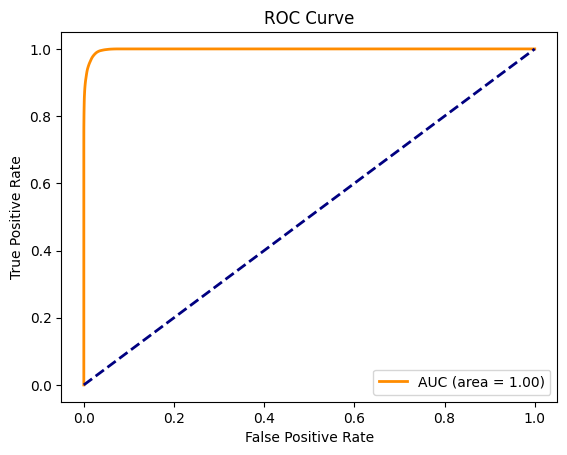

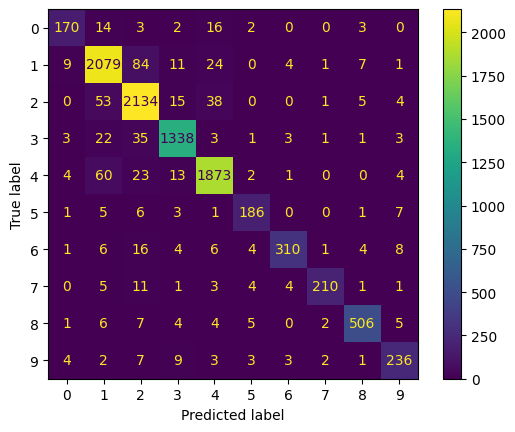

Accuracy: 0.9331269349845202
F1 Score: 0.9332518174955157
Precision: 0.9333836355318798
Recall/Sensitivity/True Positive Rate: 0.9331269349845202
False Positive Rate: [0.00000000e+00 0.00000000e+00 1.14665749e-05 2.29331499e-05
 3.43997248e-05 4.58662997e-05 5.73328747e-05 8.02660245e-05
 9.17325995e-05 1.14665749e-04 3.32530673e-04 3.55463823e-04
 3.78396973e-04 4.12796698e-04 4.35729847e-04 4.47196422e-04
 5.84795322e-04 6.07728472e-04 6.87994496e-04 7.91193670e-04
 8.37059970e-04 9.28792570e-04 9.51725720e-04 1.03199174e-03
 1.07785804e-03 1.10079119e-03 1.14665749e-03 1.19252379e-03
 1.23839009e-03 1.26132324e-03 1.78878569e-03 1.82318541e-03
 1.93785116e-03 2.09838321e-03 2.15571609e-03 2.40798074e-03
 2.60291251e-03 2.83224401e-03 2.90104346e-03 2.95837633e-03
 3.19917441e-03 3.33677331e-03 3.50877193e-03 3.62343768e-03
 3.71517028e-03 3.81836945e-03 3.88716890e-03 4.23116615e-03
 6.07728472e-03 6.51301456e-03 6.77674579e-03 6.83407866e-03
 7.20100906e-03 7.44180713e-03 7.5564728

In [314]:
train_test_split_with_model(model_raw_grid,x_train_all,x_train_all,y_train_all,y_train_all)

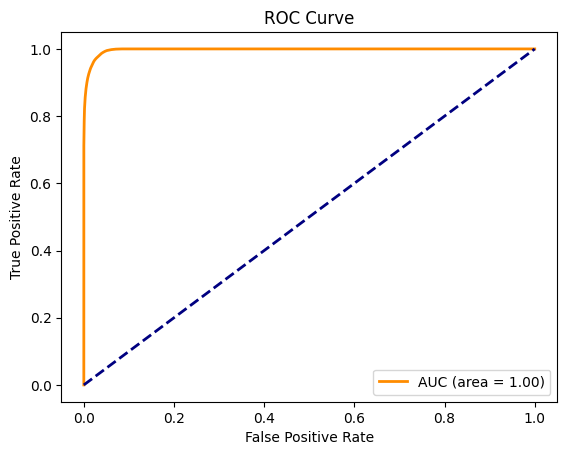

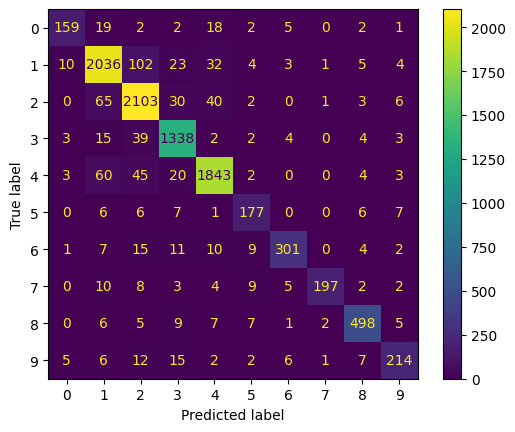

Accuracy: 0.9149638802889577
F1 Score: 0.9153330409635378
Precision: 0.9152634512025062
Recall/Sensitivity/True Positive Rate: 0.9149638802889577
False Positive Rate: [0.00000000e+00 0.00000000e+00 1.14665749e-05 2.29331499e-05
 3.43997248e-05 4.58662997e-05 5.73328747e-05 2.75197798e-04
 2.98130948e-04 3.21064098e-04 3.43997248e-04 3.78396973e-04
 4.24263273e-04 4.47196422e-04 5.84795322e-04 6.19195046e-04
 6.99461071e-04 7.33860796e-04 8.37059970e-04 1.12372434e-03
 1.21545694e-03 1.23839009e-03 1.27278982e-03 1.34158927e-03
 1.36452242e-03 1.41038872e-03 1.43332187e-03 1.50212132e-03
 1.52505447e-03 1.55945419e-03 2.15571609e-03 2.20158239e-03
 2.23598211e-03 2.35064786e-03 2.44238046e-03 2.47678019e-03
 2.84371058e-03 3.03864236e-03 3.08450866e-03 3.31384016e-03
 3.93303520e-03 3.99036808e-03 4.23116615e-03 4.32289875e-03
 4.38023162e-03 4.44903107e-03 4.56369682e-03 4.65542942e-03
 4.75862860e-03 4.87329435e-03 5.07969270e-03 5.15995872e-03
 5.50395597e-03 6.90287811e-03 7.3386079

In [315]:
train_test_split_with_model(model_raw_ran,x_train_all,x_train_all,y_train_all,y_train_all)

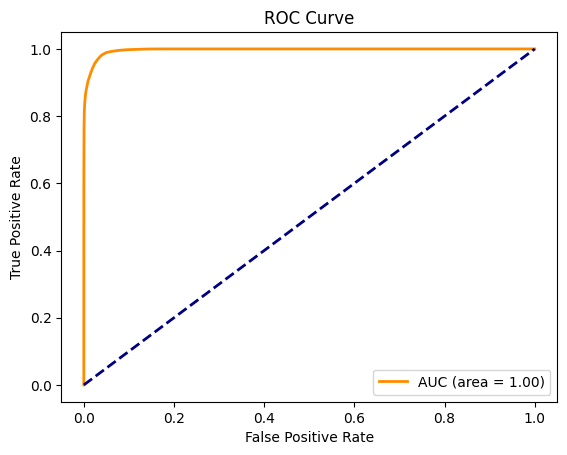

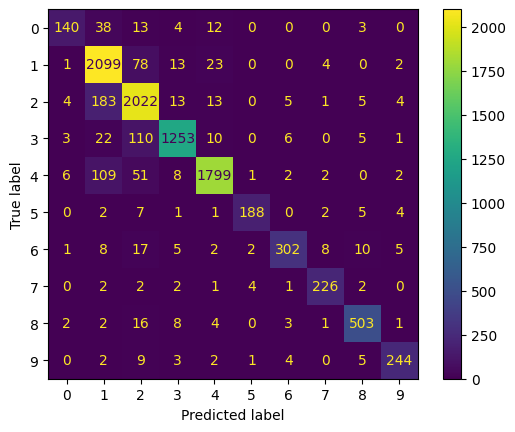

Accuracy: 0.9056759545923633
F1 Score: 0.9056266887253863
Precision: 0.908678588006647
Recall/Sensitivity/True Positive Rate: 0.9056759545923633
False Positive Rate: [0.00000000e+00 0.00000000e+00 1.14665749e-05 3.43997248e-05
 8.02660245e-05 1.26132324e-04 1.37598899e-04 2.86664373e-04
 2.98130948e-04 3.32530673e-04 3.43997248e-04 3.78396973e-04
 4.01330123e-04 4.24263273e-04 4.35729847e-04 4.81596147e-04
 5.04529297e-04 6.53594771e-04 7.33860796e-04 7.68260521e-04
 7.91193670e-04 8.48526545e-04 8.82926270e-04 9.17325995e-04
 9.63192294e-04 1.06639147e-03 1.13519092e-03 1.28425639e-03
 1.31865612e-03 1.36452242e-03 1.69705309e-03 1.76585254e-03
 1.83465199e-03 1.86905171e-03 1.93785116e-03 2.40798074e-03
 2.64877881e-03 2.70611168e-03 2.74051141e-03 3.18770783e-03
 3.23357413e-03 3.37117303e-03 3.55463823e-03 3.61197110e-03
 3.68077055e-03 4.80449490e-03 4.91916065e-03 4.99942667e-03
 5.06822612e-03 5.35489049e-03 8.06100218e-03 8.29033368e-03
 8.40499943e-03 8.71459695e-03 8.80632955

In [316]:
train_test_split_with_model(model_pro_grid,equalized_df,equalized_df,y_train_all,y_train_all)

Raw data(training with xtrain and validatig with xtest)

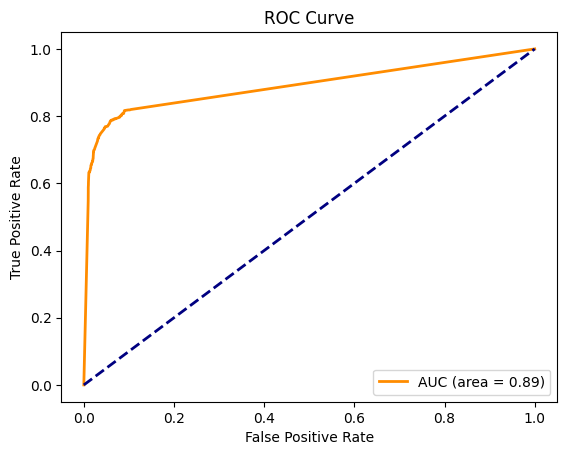

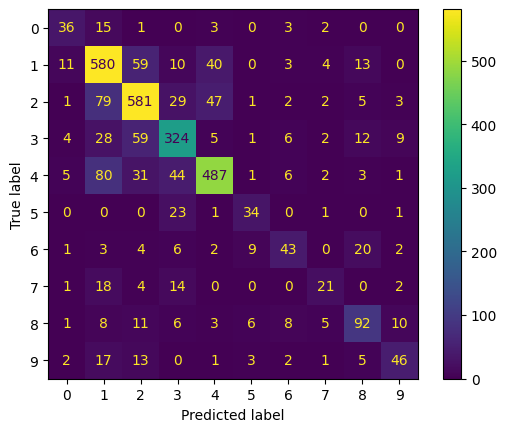

Accuracy: 0.7262135922330097
F1 Score: 0.7281095692535413
Precision: 0.7266276482228384
Recall/Sensitivity/True Positive Rate: 0.7262135922330097
False Positive Rate: [0.         0.00970874 0.00985257 0.00988853 0.01006832 0.0101762
 0.01021215 0.01035599 0.0104279  0.01046386 0.01111111 0.01147069
 0.01165049 0.0117224  0.01240561 0.01254944 0.0134484  0.0134484
 0.01416757 0.01441927 0.01542611 0.01564186 0.01610931 0.01621719
 0.01625315 0.01679252 0.01704423 0.01704423 0.01711615 0.01941748
 0.0197411  0.02010068 0.02064006 0.02096368 0.02121539 0.02128731
 0.02139518 0.02164689 0.02171881 0.02243797 0.02272564 0.02340885
 0.0236246  0.02380439 0.02384035 0.02423589 0.0299173  0.03038475
 0.03074434 0.03078029 0.03131967 0.03142754 0.03149946 0.03247033
 0.03268608 0.03272204 0.03279396 0.03419633 0.03462783 0.03523912
 0.03531104 0.03606616 0.03660554 0.03793599 0.04505574 0.04537936
 0.0466379  0.04685365 0.04732111 0.04789644 0.04814815 0.05149227
 0.05217548 0.05239123 0.052966

In [310]:
train_test_split_with_model(model_raw_grid,x_train_all,x_test_all,y_test_all,y_train_all)

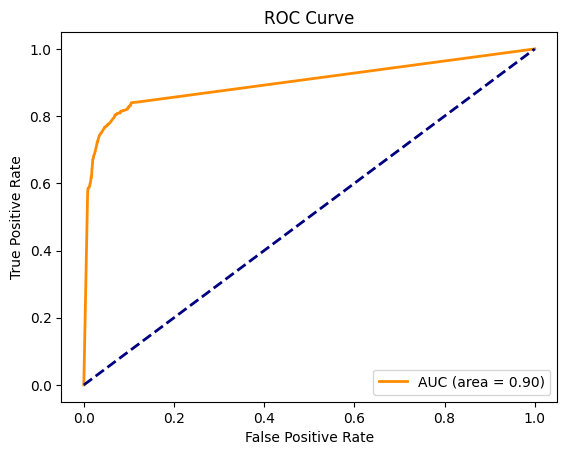

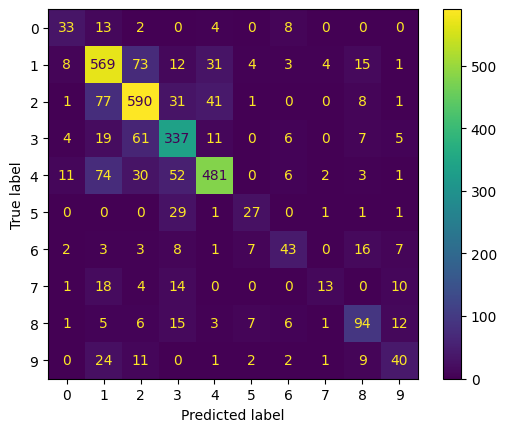

Accuracy: 0.7207119741100324
F1 Score: 0.7242370614815872
Precision: 0.7210312224514764
Recall/Sensitivity/True Positive Rate: 0.7207119741100324
False Positive Rate: [0.         0.00791082 0.00809061 0.00819849 0.00819849 0.00827041
 0.00891766 0.00927724 0.00967278 0.00981661 0.00988853 0.01067961
 0.0112909  0.01218986 0.01218986 0.01290903 0.01326861 0.01352032
 0.01546206 0.01567781 0.01585761 0.01636102 0.01636102 0.01639698
 0.01693635 0.01711615 0.01725998 0.0173319  0.01736785 0.0180151
 0.01805106 0.01837469 0.01873427 0.01880618 0.01891406 0.01895002
 0.0193096  0.01956131 0.01963323 0.02121539 0.0214671  0.02153901
 0.02157497 0.02175476 0.0218986  0.02258181 0.02279755 0.02297735
 0.02351672 0.02376843 0.02394822 0.02434376 0.02783172 0.02829917
 0.02865876 0.02894642 0.02898238 0.0290543  0.02977346 0.02984538
 0.03024092 0.03049263 0.03398058 0.03412442 0.03419633 0.03426825
 0.03567062 0.03610212 0.03671341 0.03692916 0.03768429 0.03872708
 0.03926645 0.0394822  0.03966

In [311]:
train_test_split_with_model(model_raw_ran,x_train_all,x_test_all,y_test_all,y_train_all)

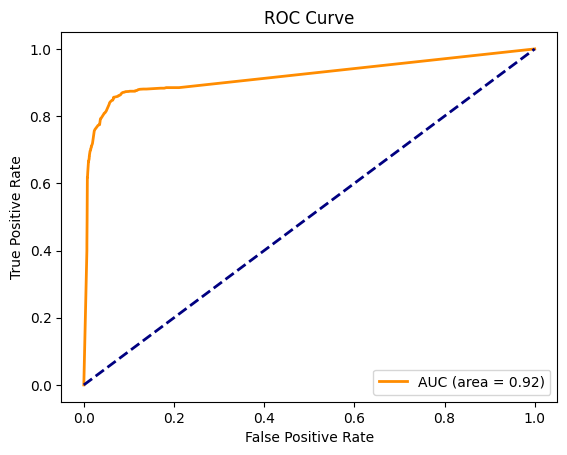

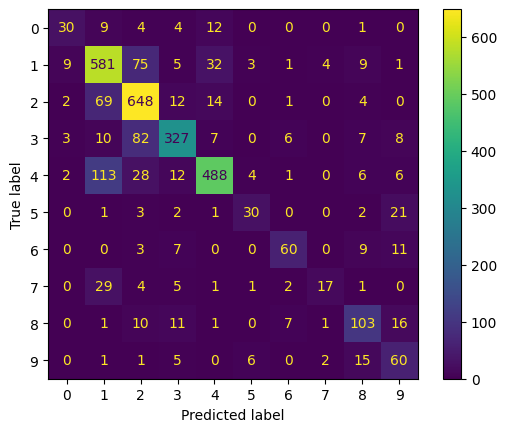

Accuracy: 0.7585760517799353
F1 Score: 0.7603643952799731
Precision: 0.7673167784616253
Recall/Sensitivity/True Positive Rate: 0.7585760517799353
False Positive Rate: [0.         0.00679612 0.00683207 0.0071557  0.00726357 0.00737145
 0.00751528 0.00769507 0.00773103 0.00783891 0.00812657 0.00830636
 0.00837828 0.0084502  0.00848616 0.00862999 0.00870191 0.0093132
 0.00960086 0.00992449 0.00992449 0.01032003 0.01053578 0.01064365
 0.01107515 0.01125494 0.01175836 0.0121539  0.01244157 0.01251348
 0.0134484  0.01384394 0.01416757 0.01420352 0.01503056 0.01535419
 0.01539015 0.01553398 0.01610931 0.01621719 0.0164689  0.01668465
 0.0167206  0.0169004  0.01855448 0.01859044 0.01873427 0.01873427
 0.01916577 0.02297735 0.02304926 0.02315714 0.02348076 0.02358864
 0.02402014 0.0247393  0.02481122 0.03149946 0.03167925 0.03502337
 0.03505933 0.03674937 0.03739662 0.03750449 0.03811579 0.04332974
 0.04437253 0.04444444 0.04473211 0.04480403 0.0449119  0.04555915
 0.0466379  0.04955052 0.05030

In [312]:
train_test_split_with_model(model_pro_grid,equalized_df,equalized_df_test,y_test_all,y_train_all)

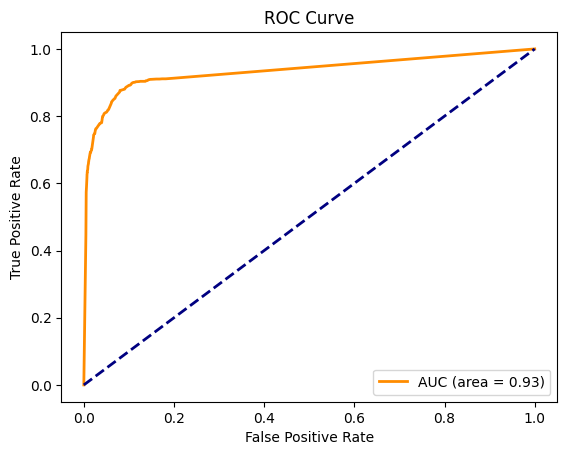

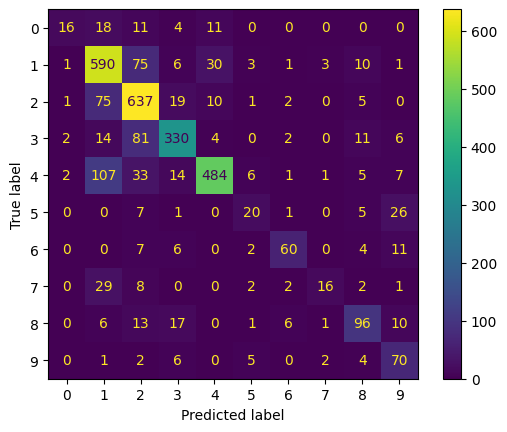

Accuracy: 0.7504854368932039
F1 Score: 0.7548890039865322
Precision: 0.7605144436108574
Recall/Sensitivity/True Positive Rate: 0.7504854368932039
False Positive Rate: [0.         0.00460266 0.00489033 0.0049982  0.00514204 0.00517799
 0.00528587 0.00546566 0.00553758 0.00557353 0.00575333 0.00589716
 0.00650845 0.00679612 0.00679612 0.00690399 0.00711974 0.00747932
 0.00747932 0.00751528 0.00773103 0.00783891 0.00827041 0.00827041
 0.0084502  0.00870191 0.00909745 0.01024811 0.01032003 0.01039195
 0.0104279  0.0104279  0.01082344 0.01082344 0.01103919 0.01114707
 0.01197411 0.01204603 0.01211794 0.01229773 0.01233369 0.01290903
 0.01312478 0.01316073 0.0138799  0.01395182 0.01395182 0.01398777
 0.01456311 0.01499461 0.0151744  0.01546206 0.01567781 0.01589356
 0.01686444 0.01693635 0.0171521  0.01736785 0.01765552 0.0214671
 0.02175476 0.02373247 0.02427184 0.02506293 0.02520676 0.02549443
 0.02574613 0.02628551 0.02675297 0.02783172 0.02790363 0.03462783
 0.03509529 0.03610212 0.03944

In [313]:
train_test_split_with_model(model_pro_ran,equalized_df,equalized_df_test,y_test_all,y_train_all)

### Hyper-parameter Tuned Model evaluation

#### The Metrics from the above code:

##### The Training Set(Raw Data)

Accuracy: 0.9331269349845202

F1 Score: 0.9332518174955157

Area under ROC curve: 0.9971603659092035

##### The Validation Set(Raw Data)

Accuracy: 0.7262135922330097

F1 Score: 0.7281095692535413

Area under ROC curve: 0.8752534089727817

##### The Training Set(on Preproccesed Data)

Accuracy: 0.9056759545923633

F1 Score: 0.9056266887253863

Area under ROC curve: 0.9932352118720053

##### The Validation set (on Preprocessed Data)

Accuracy: 0.7504854368932039

F1 Score: 0.7548890039865322

Area under ROC curve: 0.9205132733150828


We tried reducing the overfitting by hyper parameter tuning but As we can see the accuracy goes down significantly on the validation set. A drop of 21% in the accuracy for the raw data and a drop of 15% on the Preprocessed data. But as we can see in the area under ROC curve we hav a drop of 12% in the raw data and a drop of 7% in the Preprocessed data which shows us that the overfitting has reduced when compared to the raw data but not enough to say that our model doesn't overfit. The ROC graphs before hyperparameter tuning had a sharp elbow but after the hyperparameter tuning the curve was smoother which indicated that the overfitting had reduced.

This discrepancy indicates that the model might be overfitting. This might be due to our dataset being noisy and the decision tree learning these abnormalities that don't generalize well to new data. The model might be too complex or too finely tuned to the training data, causing it to perform worse on unseen data. 

When the model performs significantly better on the training set compared to the validation set, it's a sign that the model might not generalize well and could benefit from regularization techniques or adjustments to reduce overfitting. Regularization methods like dropout, feature selection, or reducing model complexity might help address this issue.

learning curve on the best datasets

Cross-validation accuracy scores: [0.8255934  0.82043344 0.82043344 0.83384933 0.82352941 0.8255934
 0.83488132 0.82146543 0.8379773  0.80908153]
Mean accuracy: 0.8252837977296181
Overall Precision: 0.7774442582288773
Overall Recall: 0.7818077528620082
Overall F1 Score: 0.779423583006805


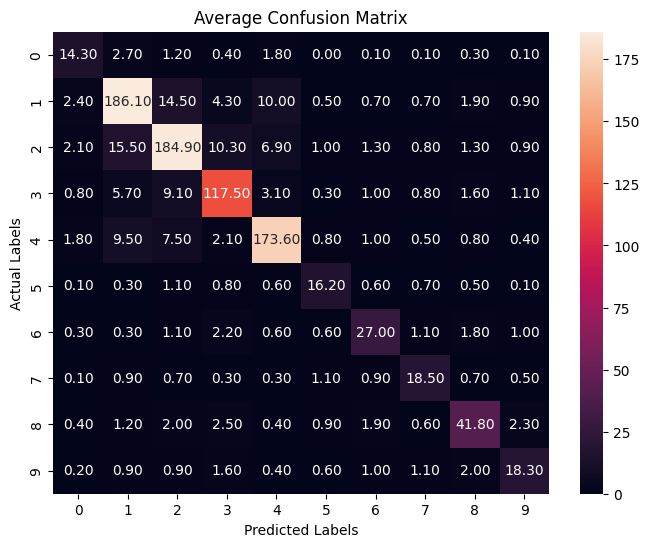

Overall ROC-AUC: 0.8795145386601911


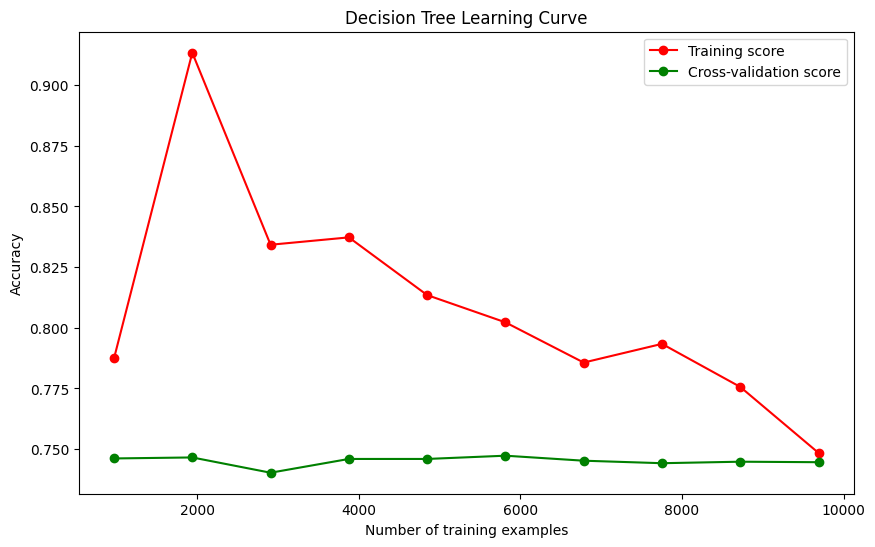

Average Training Score: 0.8090794443653875
Average Cross-Validation Score: 0.7450773993808049


In [277]:
cross_val_metrics(equalized_df,y_train_all) #learning curve on best dataset and normal decision tree

### The Moving 30% and 60% data from training data and apllying the above

In [176]:
import numpy as np
# x,y_train/test_data needs to be in DataFrame type
def doMove(percent, X_train_data ,y_train_data ,X_test_data, y_test_data):

    num_datapoints = (percent * len(X_train_data))/100
    random_order = np.arange(len(X_train_data))
    np.random.shuffle(random_order)
    
    randomized_data  = np.array(X_train_data)[random_order]
    randomized_labels = np.array(y_train_data)[random_order]

    moved_test_data = randomized_data[:int(num_datapoints)]
    moved_test_labels = randomized_labels[:int(num_datapoints)]

    
    new_test_data = np.concatenate([np.array(X_test_data),moved_test_data])
    
    new_test_labels = np.concatenate([np.array(y_test_data),moved_test_labels])

    new_train_data = randomized_data[int(num_datapoints):]
    new_train_labels = randomized_labels[int(num_datapoints):]
    

    
    return pd.DataFrame(new_train_data),pd.DataFrame(new_train_labels),pd.DataFrame(new_test_data),pd.DataFrame(new_test_labels)

### We will be applying the 30% and 60% move on the raw data and the histogram equilized data

Rawdata

In [177]:
X30,y30,Xt30,yt30 =doMove(30,x_train_all,y_train_all,x_test_all,y_test_all)

In [178]:
X60,y60,Xt60,yt60 =doMove(60,x_train_all,y_train_all,x_test_all,y_test_all)

Preprocessed data


In [179]:
X30_pro,y30_pro,Xt30_pro,yt30_pro =doMove(30,equalized_df,y_train_all,equalized_df_test,y_test_all)

In [180]:
X60_pro,y60_pro,Xt60_pro,yt60_pro =doMove(60,equalized_df,y_train_all,equalized_df_test,y_test_all)

### Now we will apply the hyper parameter tuning function and then find the accuracies 

### Raw data

30% data

In [301]:
model = model_raw_grid
accuracycalc(model,X30,y30,Xt30,yt30)#calculating the accuracy on the model found

Accuracy: 0.7845589461397365


In [302]:
model = model_raw_ran
accuracycalc(model,X30,y30,Xt30,yt30)#calculating the accuracy on the model found

Accuracy: 0.7713856928464232


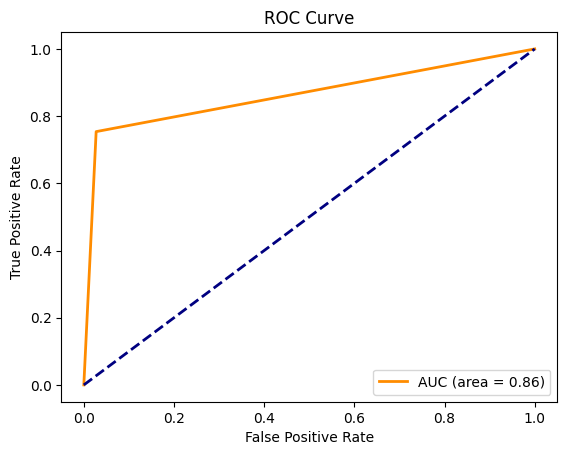

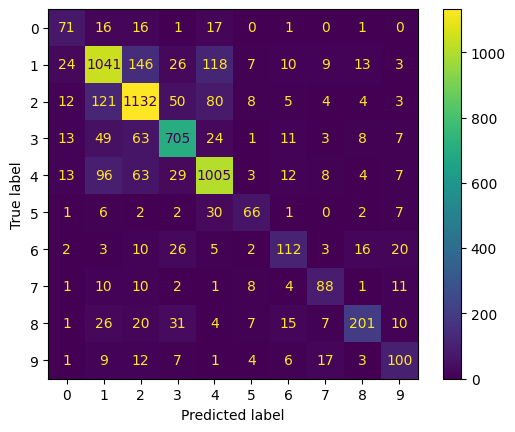

Accuracy: 0.7538769384692346
F1 Score: 0.754499427860584
Precision: 0.7542856430357494
Recall/Sensitivity/True Positive Rate: 0.7538769384692346
False Positive Rate: [0.         0.02734701 1.        ]
Area under ROC curve: 0.8501277789187455
Confusion Matrix:
 [[  71   16   16    1   17    0    1    0    1    0]
 [  24 1041  146   26  118    7   10    9   13    3]
 [  12  121 1132   50   80    8    5    4    4    3]
 [  13   49   63  705   24    1   11    3    8    7]
 [  13   96   63   29 1005    3   12    8    4    7]
 [   1    6    2    2   30   66    1    0    2    7]
 [   2    3   10   26    5    2  112    3   16   20]
 [   1   10   10    2    1    8    4   88    1   11]
 [   1   26   20   31    4    7   15    7  201   10]
 [   1    9   12    7    1    4    6   17    3  100]]


In [185]:
train_test_split(X30,Xt30,yt30,y30)

60% data

In [303]:
model = model_raw_grid
accuracycalc(model,X60,y60,Xt60,yt60)#calculating the accuracy on the model found

Accuracy: 0.7512353998203055


In [304]:
model = model_raw_ran
accuracycalc(model,X60,y60,Xt60,yt60)#calculating the accuracy on the model found

Accuracy: 0.7559523809523809


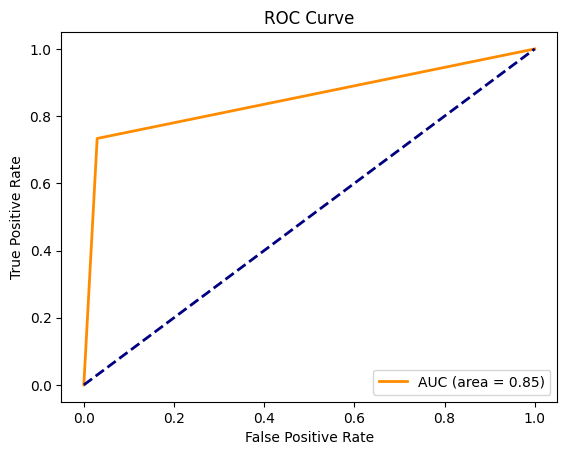

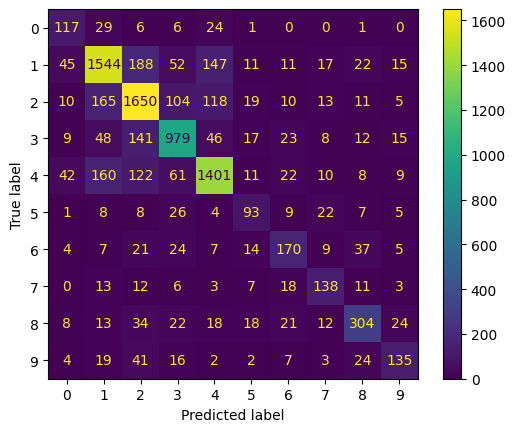

Accuracy: 0.7334905660377359
F1 Score: 0.7331237347172506
Precision: 0.7354932184635244
Recall/Sensitivity/True Positive Rate: 0.7334905660377359
False Positive Rate: [0.         0.02961216 1.        ]
Area under ROC curve: 0.8393766033743908
Confusion Matrix:
 [[ 117   29    6    6   24    1    0    0    1    0]
 [  45 1544  188   52  147   11   11   17   22   15]
 [  10  165 1650  104  118   19   10   13   11    5]
 [   9   48  141  979   46   17   23    8   12   15]
 [  42  160  122   61 1401   11   22   10    8    9]
 [   1    8    8   26    4   93    9   22    7    5]
 [   4    7   21   24    7   14  170    9   37    5]
 [   0   13   12    6    3    7   18  138   11    3]
 [   8   13   34   22   18   18   21   12  304   24]
 [   4   19   41   16    2    2    7    3   24  135]]


In [197]:
train_test_split(X60,Xt60,yt60,y60)

### Preprocessed Data

#### 30% data

In [305]:
model = model_pro_grid
accuracycalc(model,X30_pro,y30_pro,Xt30_pro,yt30_pro)#calculating the accuracy on the model found

Accuracy: 0.7885609471402368


In [306]:
model = model_pro_ran
accuracycalc(model,X30_pro,y30_pro,Xt30_pro,yt30_pro)#calculating the accuracy on the model found

Accuracy: 0.7920626980156745


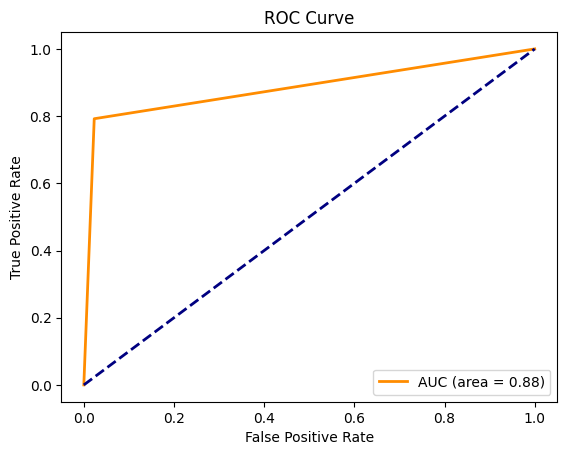

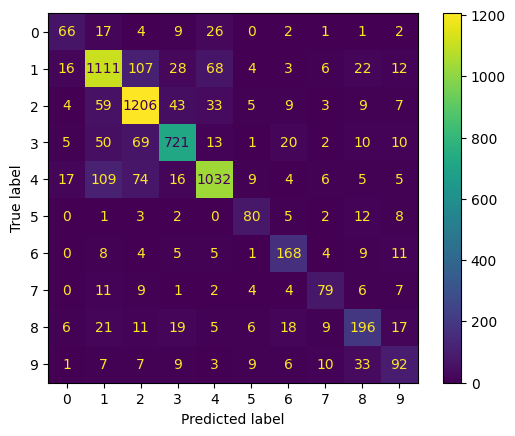

Accuracy: 0.7922294480573621
F1 Score: 0.7925641364114279
Precision: 0.7931131140287712
Recall/Sensitivity/True Positive Rate: 0.7922294480573621
False Positive Rate: [0.         0.02308562 1.        ]
Area under ROC curve: 0.8753463449215033
Confusion Matrix:
 [[  66   17    4    9   26    0    2    1    1    2]
 [  16 1111  107   28   68    4    3    6   22   12]
 [   4   59 1206   43   33    5    9    3    9    7]
 [   5   50   69  721   13    1   20    2   10   10]
 [  17  109   74   16 1032    9    4    6    5    5]
 [   0    1    3    2    0   80    5    2   12    8]
 [   0    8    4    5    5    1  168    4    9   11]
 [   0   11    9    1    2    4    4   79    6    7]
 [   6   21   11   19    5    6   18    9  196   17]
 [   1    7    7    9    3    9    6   10   33   92]]


In [201]:
train_test_split(X30_pro,Xt30_pro,yt30_pro,y30_pro)

#### 60% data

In [307]:
model = model_pro_grid
accuracycalc(model,X60_pro,y60_pro,Xt60_pro,yt60_pro)#calculating the accuracy on the model found

Accuracy: 0.754941599281222


In [308]:
model = model_pro_ran
accuracycalc(model,X60_pro,y60_pro,Xt60_pro,yt60_pro)#calculating the accuracy on the model found

Accuracy: 0.7581985624438454


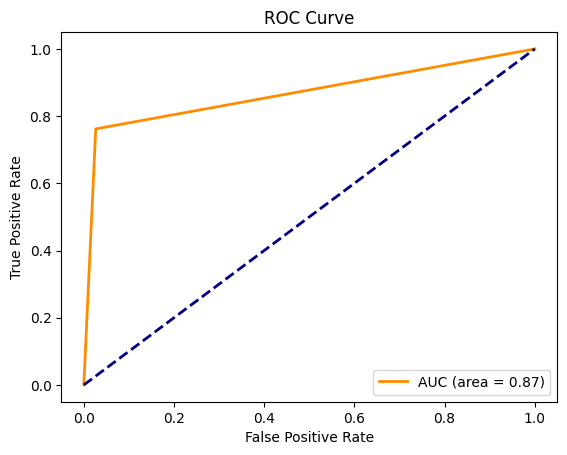

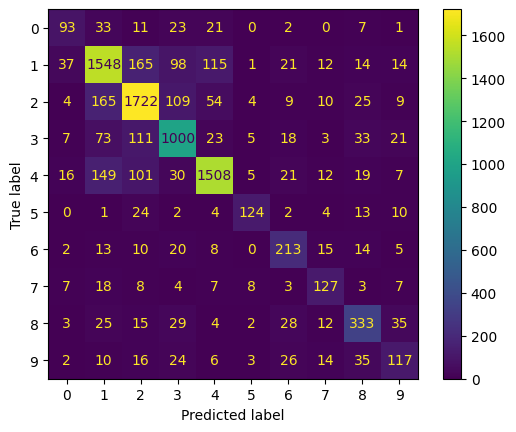

Accuracy: 0.7620170709793351
F1 Score: 0.7620250442331314
Precision: 0.7632397636776479
Recall/Sensitivity/True Positive Rate: 0.7620170709793351
False Positive Rate: [0.         0.02644255 1.        ]
Area under ROC curve: 0.856875991242887
Confusion Matrix:
 [[  93   33   11   23   21    0    2    0    7    1]
 [  37 1548  165   98  115    1   21   12   14   14]
 [   4  165 1722  109   54    4    9   10   25    9]
 [   7   73  111 1000   23    5   18    3   33   21]
 [  16  149  101   30 1508    5   21   12   19    7]
 [   0    1   24    2    4  124    2    4   13   10]
 [   2   13   10   20    8    0  213   15   14    5]
 [   7   18    8    4    7    8    3  127    3    7]
 [   3   25   15   29    4    2   28   12  333   35]
 [   2   10   16   24    6    3   26   14   35  117]]


In [205]:
train_test_split(X60_pro,Xt60_pro,yt60_pro,y60_pro)

### Now we apply metrics and learning curve on the 30% and 60% data

#### Raw data

Cross-validation accuracy scores: [0.82179676 0.82916053 0.83063328 0.820059   0.84365782 0.79646018
 0.81710914 0.79056047 0.80678466 0.79351032]
Mean accuracy: 0.8149732167294432
Overall Precision: 0.7711627673291722
Overall Recall: 0.7671659393596146
Overall F1 Score: 0.76889616991434


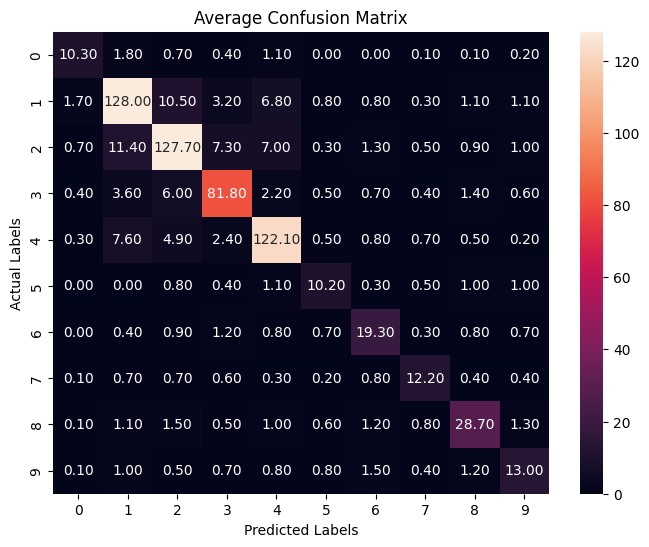

Overall ROC-AUC: 0.8744299718029642


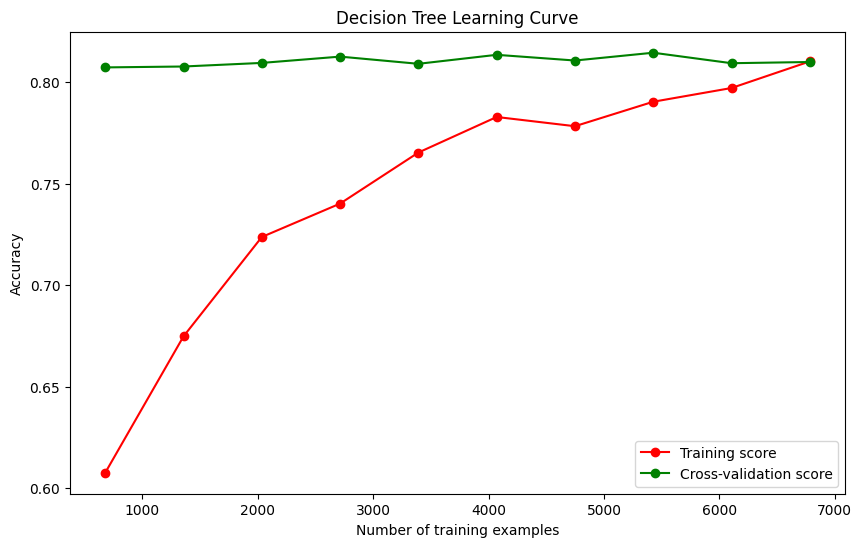

Average Training Score: 0.7469938948815248
Average Cross-Validation Score: 0.8102843848971029


In [278]:
cross_val_metrics(X30,y30) #applying learning curve and getting the accuracy

Cross-validation accuracy scores: [0.73453608 0.75257732 0.7757732  0.75257732 0.75773196 0.75515464
 0.74677003 0.76744186 0.77002584 0.77777778]
Mean accuracy: 0.7590366019339886
Overall Precision: 0.7047511574867499
Overall Recall: 0.706530189050733
Overall F1 Score: 0.7050501080702333


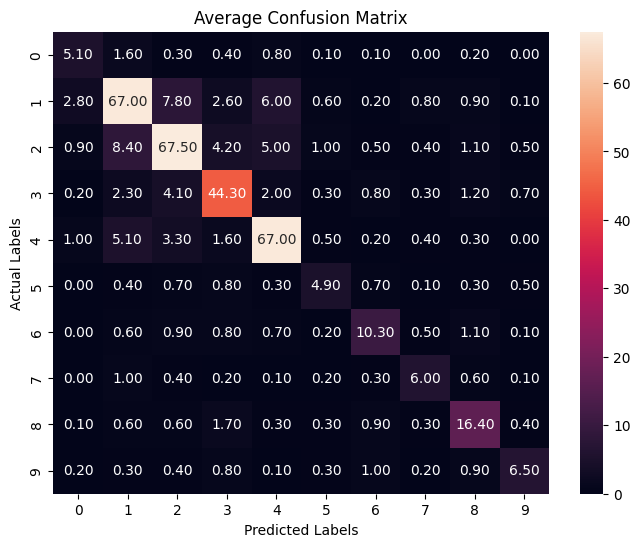

Overall ROC-AUC: 0.8396727217747237


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


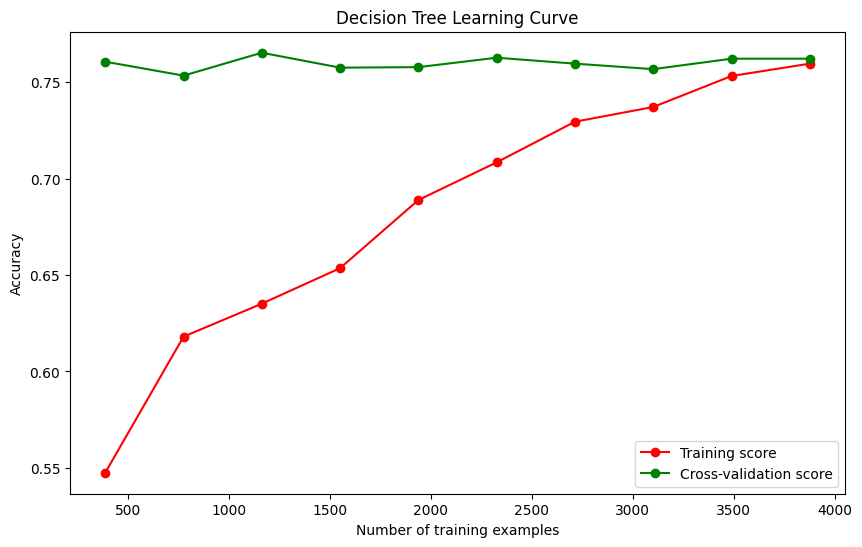

Average Training Score: 0.6830778318634325
Average Cross-Validation Score: 0.7597587176003623


In [279]:
cross_val_metrics(X60,y60) #applying learning curve and getting the accuracy

#### Preprocessed Data

Cross-validation accuracy scores: [0.78645066 0.78939617 0.80559647 0.820059   0.83185841 0.820059
 0.7920354  0.83185841 0.81563422 0.80088496]
Mean accuracy: 0.8093832679500046
Overall Precision: 0.7655141571403331
Overall Recall: 0.7587465810100541
Overall F1 Score: 0.7619351813731128


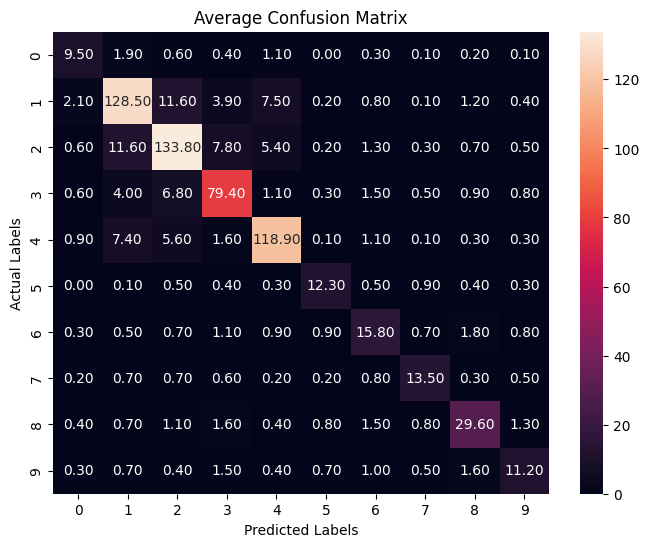

Overall ROC-AUC: 0.8738985801403167


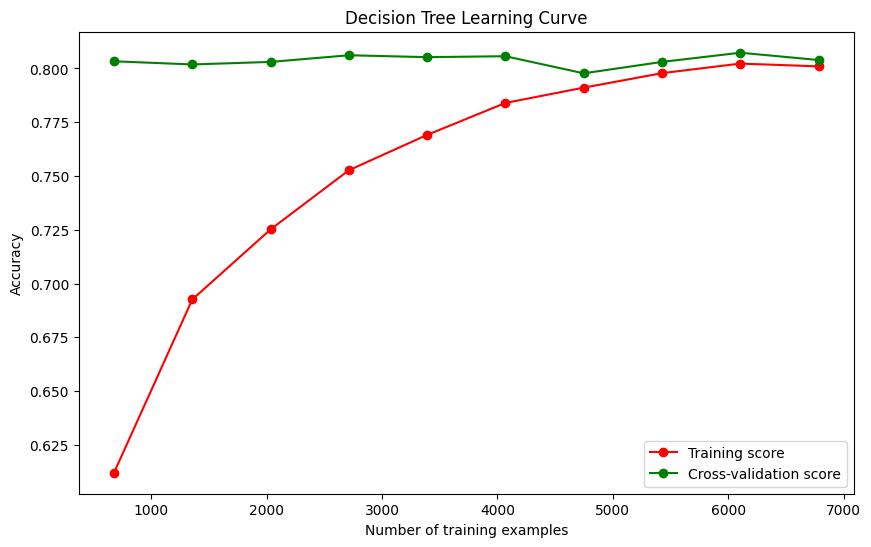

Average Training Score: 0.7527647668218562
Average Cross-Validation Score: 0.8037274579569991


In [280]:
cross_val_metrics(X30_pro,y30_pro) #applying learning curve and getting the accuracy

Cross-validation accuracy scores: [0.72938144 0.80154639 0.7757732  0.77319588 0.76030928 0.78608247
 0.75968992 0.76744186 0.75968992 0.7622739 ]
Mean accuracy: 0.7675384267028955
Overall Precision: 0.6797460607383193
Overall Recall: 0.6933363074146507
Overall F1 Score: 0.6855060297974414


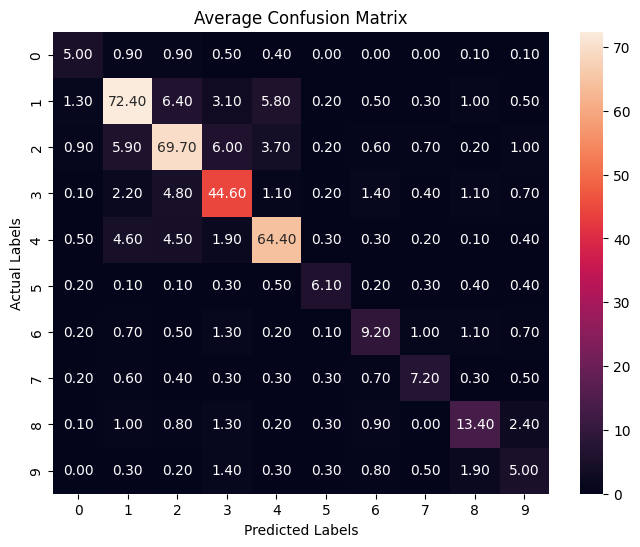

Overall ROC-AUC: 0.837515789426224


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


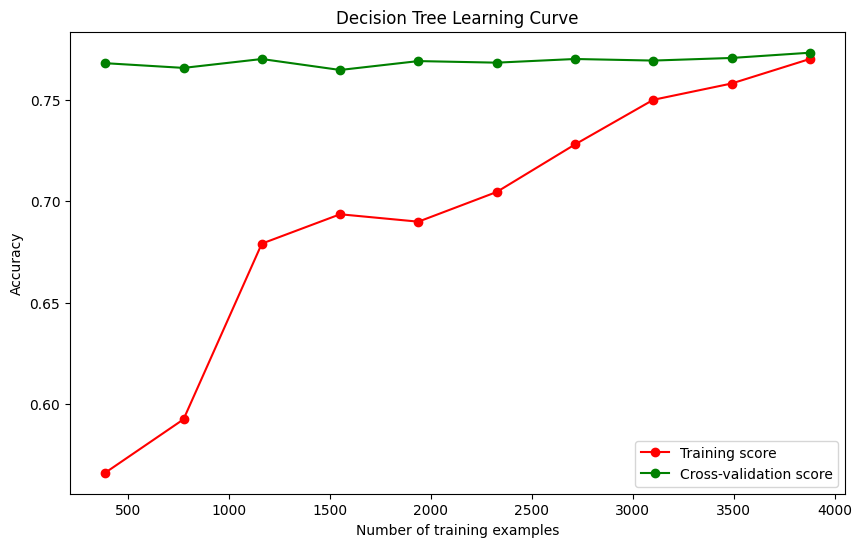

Average Training Score: 0.6931669533465639
Average Cross-Validation Score: 0.7689512240603106


In [281]:
cross_val_metrics(X60_pro,y60_pro) #applying learning curve and getting the accuracy

### Visualisations

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

import numpy as np

In [236]:
model = DecisionTreeClassifier()

In [237]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns

def visualise(model,xdata,ydata,xtest,ytest,heatMap=False,treePlot=False):
    # fit dataset on model
    model.fit(xdata, ydata)

    # get predicted labels
    y_pred = model.predict(xtest)
    # get list of class labels
    labels = list(np.unique(np.array(ydata)))
    # If heatMap is to be plotted
    if(heatMap==True):
        conf_matrix = confusion_matrix(ytest, y_pred)
        
        # Plot the confusion matrix heatmap
        plt.figure(figsize=(10, 10))
        sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Labels")
        plt.ylabel("Actual Labels")
        plt.show()

    # If Decision Tree is to be plotted
    if (treePlot==True):
        plt.figure(figsize=(12, 12))
        plot_tree(model, filled=True, feature_names=list(xdata.columns), class_names=[str(i) for i in labels], rounded=True)
        plt.title("Decision Tree Classifier")
        plt.show()

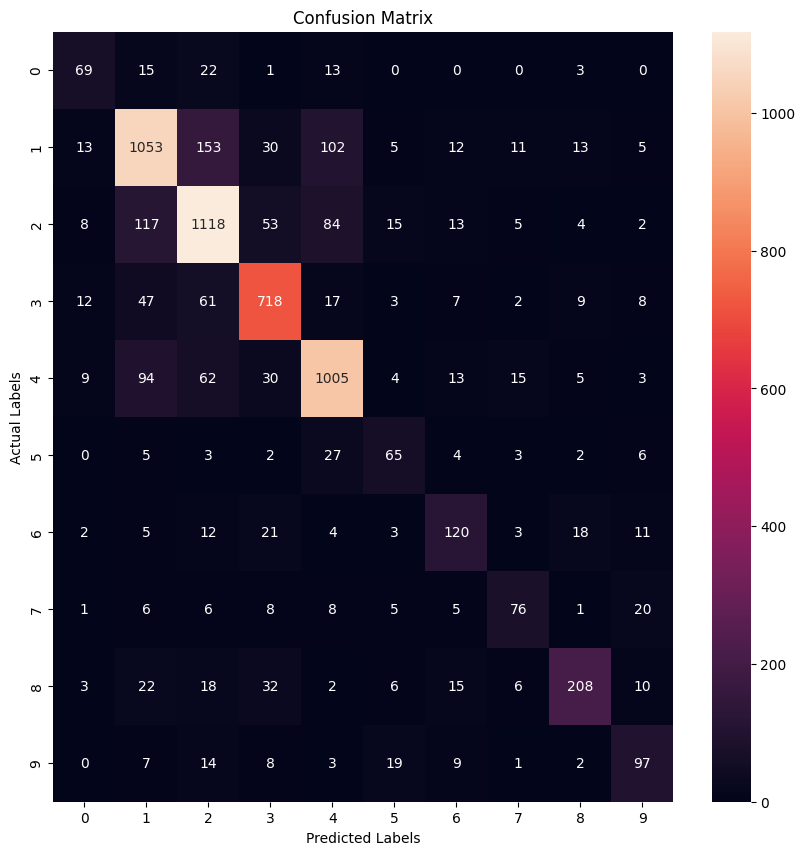

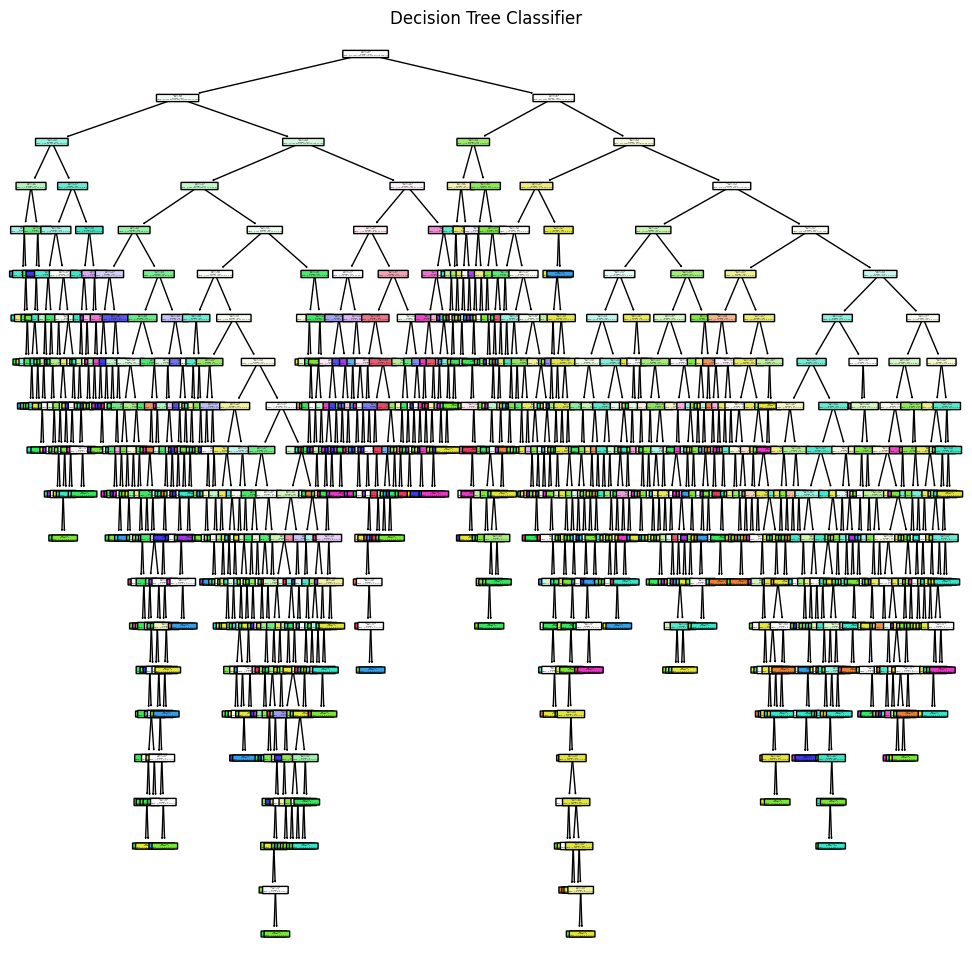

In [238]:
# get visualisations for 30 % moved dataset
visualise(model,X30,y30,Xt30,yt30,treePlot=True,heatMap=True)

In [239]:
# function to reduce number of samples from each class and get equal number of samples from each
def stratifyData(num_samples,xtrain, ytrain):
    # create copy of training labels
    y_cop = y
    y_cop.rename(columns={'0': 'label'},inplace=True)

    # convert labels df into array
    labels = np.array(y_cop)
    # initialise dictionary to count number of data points in each class
    class_counts = {}
    # get number of data points in each class and update dictionary
    for label in labels:
        
        if label[0] in class_counts:
            class_counts[label[0]] = class_counts[label[0]] + 1
        else:
            class_counts[label[0]] = 1
            
    # Find the class with minimum datapoints
    min_class = min(class_counts, key=class_counts.get)

    # Get the minimum value
    min_value = class_counts[min_class]

    samples_to_select = min(min_value,num_samples)
    # Initialize arrays to store the stratified subsample
    X_stratified = np.empty((0, X.shape[1]))
    y_stratified = np.empty((0,1))

    # Iterate over unique classes
    for class_num in np.unique(y):
        # get indices where class label is equal to current class label
        indices = np.where(y == class_num)[0]     
        
        # from xtrain and ytrain get the first 'samples_to_select' number of samples and concatenate the stratified array
        X_stratified = np.concatenate([X_stratified, np.array(xtrain)[indices[:samples_to_select]]])
        y_stratified = np.concatenate([y_stratified, np.array(ytrain)[indices[:samples_to_select]]])
    # return stratified arrays
    return X_stratified,y_stratified

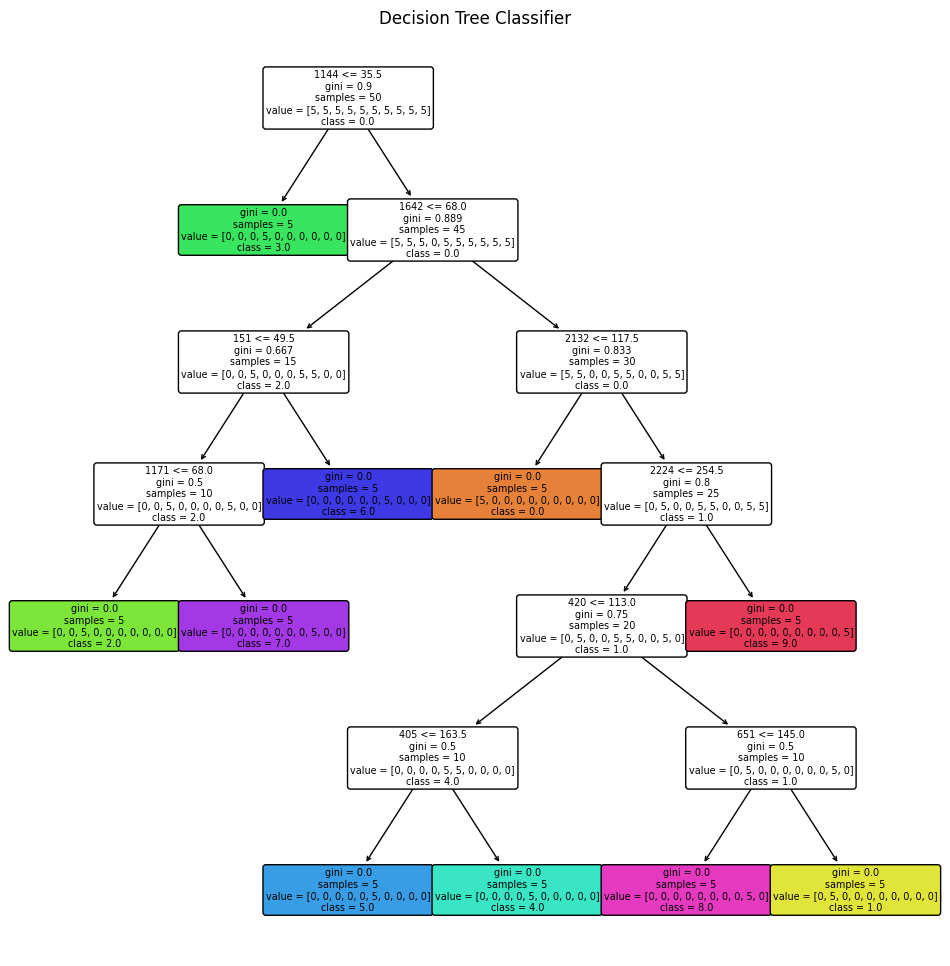

In [248]:
# obtain stratified arrays with 5 samples from each class
x_strat , y_strat = stratifyData(5,X,y)
# get tree visualisation (only treePlot is set to true)
visualise(model,pd.DataFrame(x_strat),pd.DataFrame(y_strat),Xt30,yt30,treePlot=True)

### Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def randomforestClassifier(xdata,ydata,xtest,ytest):
    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=19)

    # Train the model
    clf.fit(xdata, ydata)

    # Make predictions on the test set
    y_pred = clf.predict(xtest)

    # Evaluate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    print(f"Accuracy: {accuracy}")


Random forest classifier on the split data for both raw and preprocessed data , raw data, equilized (preprocessed) data

In [ ]:
randomforestClassifier(X30,y30,Xt30,yt30)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.83925295981324


In [ ]:
randomforestClassifier(X60,y60,Xt60,yt60)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.8556828391734053


In [ ]:
randomforestClassifier(X30_pro,y30_pro,Xt30_pro,yt30_pro)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.9061197265299317


In [ ]:
randomforestClassifier(X60_pro,y60_pro,Xt60_pro,yt60_pro)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.890947888589398


In [ ]:
randomforestClassifier(x_train_all,y_train_all,x_test_all,y_test_all)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.7640776699029126


In [ ]:
randomforestClassifier(equalized_df,y_train_all,equalized_df_test,y_test_all)

/var/folders/qk/mydg_vvd1gv6z5wlj72s23lm0000gn/T/ipykernel_81376/1322765778.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xdata, ydata)


Accuracy: 0.8796116504854369
